# ADP 기출문제

> 27회
1. EDA 데이터 탐색
2. 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라
- 출처https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (후처리)

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')\
.iloc[:,[1,6,8,10,12,16,17]]
df.head()

,V1,V6,V8,V10,V12,V16,V17
0,1.069141,-0.857888,-0.191270,0.041567,-0.108666,0.185441,-0.439976
1,-2.312227,-1.426545,1.391657,-2.772272,-2.899907,-1.140747,-2.830056
2,-1.932055,2.470521,-5.186855,0.155379,0.906738,0.274034,-0.222340
3,-3.043541,-1.064823,-0.067794,-0.838587,-0.503141,0.666780,0.599717
4,-0.719065,3.871978,1.089780,-0.006142,-0.384491,0.274346,-0.697730


In [ ]:
min(df.V10), max(df.V10)

(-23.2282548357516, 7.13594786604317)

In [ ]:
min(df.V6), max(df.V6)

(-10.8868199766003, 6.26848090376191)

In [ ]:
min(df.V12), max(df.V12)

NameError: ignored

# 상관관계 문제

원래 데이터에서 Time 컬럼을 제거한 데이터를 바탕으로 진행하며, 각 행이 시간과는 관련 없는 데이터라고 가정한다.# 데이터 차용

```
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv').iloc[:,1:]
```



[단순상관관계]
1. V10과 V6, v10과 V8간, v10과 v12의 선형적인 관계가 존재하는지 확인하라.

[편(부분)상관관계]
2. V12이 통제된 상황에서 V10과 V6간의 유의한 선형 관계를 갖는지 확인하고 결과를 해석하라.
3. V6이 통제된 상황에서 V10과 V12간의 유의한 선형 관계를 갖는지 확인하고 결과를 해석하라.

[다중상관관계]
4. 각 변수들간 상관계수를 구하고 상관관계 히트맵을 그려라.
5. 선형회귀분석 진행중이었을 가정하고 다중공선성을 확인하라.

> (5번 문제 한정) 데이터 가정
 - 10 종속변수, V1,6,8,12,16,17는 독립변수로 가정한다.

[순서형변수 상관관계]
6. V10 순위와 V12 순위가 연관성이 있는지 확인하라.

> 6번 문제 한정 데이터 가정
- 각 행이 주식 동아리에 있는 사람들의 데이터라고 가정한다.
>-  v10 정의 : 같은 투자액으로 주식 원금 대비 벌어들인 자산액(단위:만원)
- ex) -13.2 ->원금대비 13.2만원 손해   
> - v12 정의 : v12가 한달 동안 약속한 공부량(한달에 15회) 대비 실제 공부한 양
- ex) +5 -> 이번달 15+5 =20일 공부

## 1. V10과 V6, v10과 V8, v10과 v12 간의 선형적인 관계가 존재하는지 확인하라.
- stats.pearsonr(data1, data2)
- 귀무가설 : 두 변수 간의 선형적인 관계가 존재하지 않는다.
- 연구가설 : 두 변수 간의 선형적인 관계가 존재한다.

In [ ]:
from scipy import stats
print(stats.pearsonr(df.V10, df.V6))
#상관계수외 유의 확률이 쌍으로 출력
#상관계수는 0.34로 상관관계가 낮게 나왔으며, 유의확률 0.0001 이하로 나타났다.

PearsonRResult(statistic=0.3410787785223076, pvalue=6.96132245402049e-34)


In [ ]:
from scipy import stats
print(stats.pearsonr(df.V10, df.V8))
#상관계수외 유의 확률이 쌍으로 출력
#상관계수는 -0.181로 상관관계가 매우 낮게 나왔으며, 유의확률 0.0001이하로 나타났다.

PearsonRResult(statistic=-0.1809856029023371, pvalue=3.039940980400777e-10)


In [ ]:
from scipy import stats
print(stats.pearsonr(df.V10, df.V12))
#상관계수외 유의 확률이 쌍으로 출력
#상관계수는 0.830로 양의 상관관계가 있고, 유의확률 0.0001 이하로 나타났다.

PearsonRResult(statistic=0.8301267442305134, pvalue=1.9568771602800666e-304)


In [1]:
# 피어슨 상관관계 분석 결과,
# V10-V6,V10-V8, V10-V12 간의 상관관계가 유의확률이 0.0001이하로 유의하여,
# 귀무가설을 기각하여 각 두 변수간 선형적인 관계가 존재함을 알 수 있다.
# 그리고 v10-v8보다는 v10-v6, v10-v6보다는 v10-v12간의 상관관계가 더 높다고 볼 수 있다.

## 2. v12이 통제된 상황에서 v10과 v6간의 유의한 선형 관계를 갖는지 확인하라.
- partial_corr(data, x=변수1, y=변수2, covar=변수3)
- 귀무가설 : v12가 통제된 상황에서 v10과 v6간에는 유의한 선형 관계를 갖지 않는다.
- 독립가설 : v12가 통제된 상황에서 v10과 v6간에는 유의한 선형 관계를 갖는다.

In [ ]:
# pip install pingouin

In [ ]:
from pingouin import partial_corr
# covar은 통제하고자 하는 공변량(covariate)변수를 입력
# x, y는 순수한 편 상관관계보고자 하는 변수명으로 뒤바뀌어도 결과는 같다.
partial_corr(df, x='V10', y='V6', covar='V12')

,n,r,CI95%,p-val
pearson,1193,0.055858,"[-0.0, 0.11]",0.053856


In [ ]:
from pingouin import partial_corr
partial_corr(df, x='V6', y='V10', covar='V12')
#코드 실행 결과 n은 데이터 개수 1193개, r은 상관계수 0.0559, C195%은 신뢰구간으로 0<x<0.11, p-value는 0.054로 출력되었다.
#그밖에 r2 은 R-squared이고 adj_r2은 조정된 R-squared이다.

,n,r,CI95%,p-val
pearson,1193,0.055858,"[-0.0, 0.11]",0.053856


In [ ]:
# 편(부분) 상과관계 분석 결과 v12가 통제된 상태에서 v10과 v6간의 상관계수는 0.056, 유의확률은 0.054로 도출되었다.
# 따라서, 두 변수간에 상관관계는 여전히 유의하지 않다고 볼 수 있다.
# 다만, v12를 통제하지 않은 상태에서의 v10과 v6과의 상관계수인 0.34보다 상관계수가 약해졌다고 볼 수 있다.
# 따라서, v6이 v10에 영향을 주는 변수이긴 하지만, v12를 전혀 고려하지 않는다면 두 변수간의 관계는 훨씬 미약할 것으로 보인다.

## 3. V6이 통제된 상황에서 V10과 V12간의 유의한 선형 관계를 갖는지 확인하고 결과를 해석하라.

In [ ]:
from pingouin import partial_corr
partial_corr(df, x='V10', y='V12', covar='V6')

,n,r,CI95%,p-val
pearson,1193,0.805779,"[0.78, 0.82]",5.123867e-273


In [ ]:
# 편(부분) 상과관계 분석 결과 v6가 통제된 상태에서 v10과 v12간의 상관계수는 0.806, 유의확률은 0.001이하로 도출되었다.
# 따라서, 두 변수간에 상관관계는 여전히 유의하다고 볼 수 있다.
# 더불어, v6를 통제하지 않은 상태에서의 v10과 v12과의 상관계수인 0.83과 상관계수가 큰 차이가 없다.
# 따라서, v6를 전혀 고려하지 않는다 하더라도 v12와 v10가 서로 영향을 주는 변수임이 분명하다.

## 4. 각 변수들간 상관계수를 구하고 상관관계 히트맵을 그려라.
- df.corr(method='pearson')
- sns.heatmap(df.corr())

In [ ]:
#피어슨 상관관계 출력
df.corr(method='pearson') #default
#pearsonr() 대신 corr() 함수를 사용하면 df1 객체에 담긴 여러 변수와의 상관관계를 출력할 수 있다.
# method 인자는 상관계수 유형을 선택해주는데 수치형 변수일 때에는 pearson, 순서형 변수일때에는 spearman을 지정할 수 있다.

,V1,V6,V8,V10,V12,V16,V17
V1,1.000000,0.301923,-0.221486,0.640838,0.557434,0.578608,0.613414
V6,0.301923,1.000000,-0.308597,0.341079,0.376112,0.332483,0.323449
V8,-0.221486,-0.308597,1.000000,-0.180986,-0.222319,-0.267200,-0.315284
V10,0.640838,0.341079,-0.180986,1.000000,0.830127,0.805402,0.822406
V12,0.557434,0.376112,-0.222319,0.830127,1.000000,0.843644,0.840627
V16,0.578608,0.332483,-0.267200,0.805402,0.843644,1.000000,0.902381
V17,0.613414,0.323449,-0.315284,0.822406,0.840627,0.902381,1.000000


<Axes: >

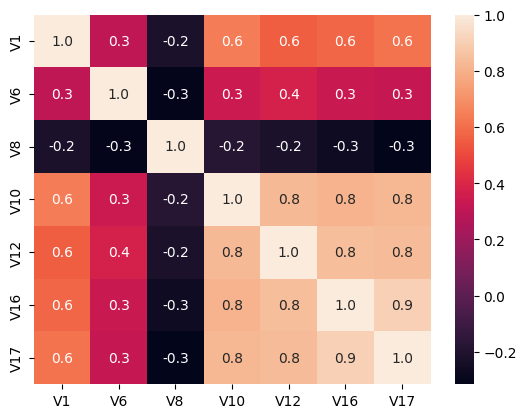

In [ ]:
import seaborn as sns
#cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.1f') # cmap=cmap # cbar =True # 막대 수치 fmt='3.1f' d #문자열

## 5. 다중공선성을 확인하라.
- 다중공선성이란 **종속변수를 제외하고** 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 말한다.
- 다중 공선성의 문제가 존재하면 정확한 회귀계수 추정이 어렵다.
- 다중 공선성의 문제가 존재하면 유의한 변수임에도 유의하지 않은 변수처럼 여겨질 수 도 있다.
- 독립변수가 많은 데이터를 만약 선형 회귀분석을 한다면 모델은 유의할지라도 adj.R_2은 낮은 수치를 나타낼 수 있다.

> 이를 개선하기 위해서는
1. 다중공선성 제거와 변수선택법으로 모델의 성능을 높여볼 수 있다.(AIC | Adj.R_2 | 각 변수의 p_value)
2. 또는 해당 변수에 패널티를 주어 모델에 미치는 영향령을 줄이는 ridge, lasso 같은 회귀분석을 할 수 도 있다.
3. PCA 방법으로 의존적인 성분 삭제 (변수 재구성) # 좋은 방법

> 다중공선성(VIF) 판단 방법
- 1 독립변수들간의 상관계수를 구하여 상관성을 직접 파악하고 상관성이 0.9이상이면 다중공선성이 있다고 판단한다.
- 2-1 두 독립변수의 허용오차 1-R_2를 구했을 때, 0.1이하면 다중공선성 문제가 심각할 수 있다.  
- 2-2 VIF(variance inflation factor)= 1/허용오차 = 1/(1-R_2) 값이 10이상이라면 다중공선성이 존재할 것으로 예상한다.
- 1번 보다는 2-1 또는 2-2방법이 더 정확함
- (개인의견) 다중공선성이 있는 변수 중 p-value가 높았던 변수를 제거하고 다중 선형 회귀분석 재진행한다.

In [ ]:
#1. 상관계수로 다중공선성확인
table = df.corr(method='pearson')
table[table >0.9]
#V16과 V17이 다중공선성이 있는 것으로 판단된다.
#그러나, 상관계수로 다중공선성 변수를 제거하기에는 둘 중 어떠한 변수를 제거할지가 애매하다.

,V1,V6,V8,V10,V12,V16,V17
V1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,1.0,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,1.0,NaN,NaN,NaN,NaN
V10,NaN,NaN,NaN,1.0,NaN,NaN,NaN
V12,NaN,NaN,NaN,NaN,1.0,NaN,NaN
V16,NaN,NaN,NaN,NaN,NaN,1.000000,0.902381
V17,NaN,NaN,NaN,NaN,NaN,0.902381,1.000000


In [ ]:
# 허용오차를 이용한 VIF 값 이용
### 방법1. dmatrics 함수 이용하여 독립변수, 종속변수 분리 후 다중공선성 값 구함
from statsmodels.stats.outliers_influence import variance_inflation_factor
##### 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
from patsy import dmatrices
y,X=dmatrices("V10~V1+ V6+V8+V12+V16+V17", data=df, return_type="dataframe")
vif_list = []
for i in range(1, len(X.columns)) :
  vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])
# v16과 v17의 vif 값이 높긴하지만 10 이상인 경우는 없어서 다중공선성에 문제가 되지 않는다고 판단된다.

,vif,variable
0,1.645907,V1
1,1.262124,V6
2,1.195490,V8
3,4.135943,V12
4,6.226549,V16
5,6.671038,V17


In [ ]:
## 허용오차를 이용한 VIF 값 이용
### 방법2. 다중공선성 아웃풋 데이터프레임을 미리 형식을 만들어 값을 구함
vif=pd.DataFrame()
df_temp = df[['V1', 'V6', 'V8','V12', 'V16', 'V17']]
vif["VIF Factor"] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
vif["features"] = df_temp.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif
## v16과 v17의 vif 값이 높긴하지만 10 이상인 경우는 없어서 다중공선성에 문제가 되지 않는다고 판단된다.
# 만약, v16,v17의 다중공선성이 10이상이었을 경우에는 하나의 변수는 제거해 준다.

,VIF Factor,features
0,1.198350,V8
1,1.301209,V6
2,1.716815,V1
3,4.505286,V12
4,6.704249,V16
5,7.197218,V17


## 6. V10 순위와 V12 순위의 연관성이 있는지 확인하라.

- 각 행이 주식 동아리에 있는 사람들의 데이터라고 가정한다.

>-  v10 정의 : 같은 투자액으로 주식 원금 대비 벌어들인 자산액(단위:만원)
- ex) -13.2 ->원금대비 13.2만원 손해   

> - v12 정의 : v12가 한달 동안 약속한 공부량(한달에 15회) 대비 실제 공부한 양
- ex) +5 -> 이번달 15+5 =20일 공부

- 스피어만 순서상관계수
- spearmanr(data1, data2)
- 자료값 대신에 자료값의 순위(rank)를 이용하여 상관계수를 구함
- 예로, (x,y) 자료이고 (1.5,10), (2.3,15), (3,13)-> (1,1), (2,3)(3,2) 로 변환하여 이용 #값이 낮은것이 상위 순위를 차지함
- 귀무가설 : v10과 v12 순위는 연관성이 없다.
- 연구가설 : v10과 v12 순위는 연관성이 있다.

In [ ]:
#지정된 데이터가 수치형일 경우 자동으로 순서형 척도로 변환하여 서열 상관계수를 출력한다.
stats.spearmanr(df.V10, df.V12)
#코드결과 서열 상관계수는 0.238,  pvalue는 0.001이하의 값이 출력되었다.

SignificanceResult(statistic=0.23816261910911987, pvalue=7.572912967453178e-17)

In [ ]:
# 주식동아리 내 벌어들인 자산액과 공부량을 서열화 한 후 스피어만 서열 상관관계 분석을 실시한 결과,
# 유의확률이 유의수준보다 훨씬 작아, 귀무가설을 기각해 공부량과 자산액이 연관성이 있다는 것은 확인할 수 있다.
# 즉 공부량의 순위와 자산액의 순위가 연관성이 있다는 것은 확신할 수 있다.
# 그러나 두변수의 순서간에는 상관관계는 존재하지만 미약한 양의 방향성을 띈다.
#(여기서 인과관계 해석을 하지 않도록 주의한다.
# ex) 공부를 많이 할수록 벌어들인 자산액은 높은 경향, 또는 벌어들인 자산액이 높을수록 공부를 많이 한 경향이 있다.)